In [13]:
pip install tableone

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from tableone import TableOne
from scipy import stats

**Paso 1: Postulacion de Problema y Recoleccion de Datos**

In [15]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df = pd.read_csv(url, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Paso 2: Exploracion y Limipeza de Datos**

In [16]:
#dimensiones
n_rows = df.shape[0]
n_columns = df.shape[1]
print(f'La tabla contiene {n_rows} filas y {n_columns} columnas')

La tabla contiene 41188 filas y 21 columnas


In [17]:
#descripcion de datos numericos
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
#frecuencia de valores en variables categoricas
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: in

In [19]:
# Columnas, tipos de dato y valores nulos
i = 1

for col in df.columns:
    print(f'{i}- {col}: {df[col].dtype}, {df[col].isna().sum()} nulos')
    i += 1

1- age: int64, 0 nulos
2- job: object, 0 nulos
3- marital: object, 0 nulos
4- education: object, 0 nulos
5- default: object, 0 nulos
6- housing: object, 0 nulos
7- loan: object, 0 nulos
8- contact: object, 0 nulos
9- month: object, 0 nulos
10- day_of_week: object, 0 nulos
11- duration: int64, 0 nulos
12- campaign: int64, 0 nulos
13- pdays: int64, 0 nulos
14- previous: int64, 0 nulos
15- poutcome: object, 0 nulos
16- emp.var.rate: float64, 0 nulos
17- cons.price.idx: float64, 0 nulos
18- cons.conf.idx: float64, 0 nulos
19- euribor3m: float64, 0 nulos
20- nr.employed: float64, 0 nulos
21- y: object, 0 nulos


**2.1 Eliminar Duplicados**

In [20]:
# detect duplicates (?)
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


- Eliminacion de duplicados no se aplica en este caso ya que puede haber sido coincidencia en los registros, y no existe identificador unico para confirmar que se trate efectivamente del mismo cliente.

**2.2 Eliminar Informacion Irrelevante**

- No aplica

**Paso 3: Analisis de Variables Univariadas**

**3.1 Analisis de Variables Categoricas**

In [21]:
#obtener variables categoricas
list_categorical = []
for col in df.columns:
    if (df[col].dtype == 'object') or (df[col].dtype == 'category'):
        list_categorical.append(col)

list_categorical, len(list_categorical)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 11)

/tmp/ipykernel_1210/1254361692.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=45)
/tmp/ipykernel_1210/1254361692.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=45)


[Text(0, 0.5, '')]

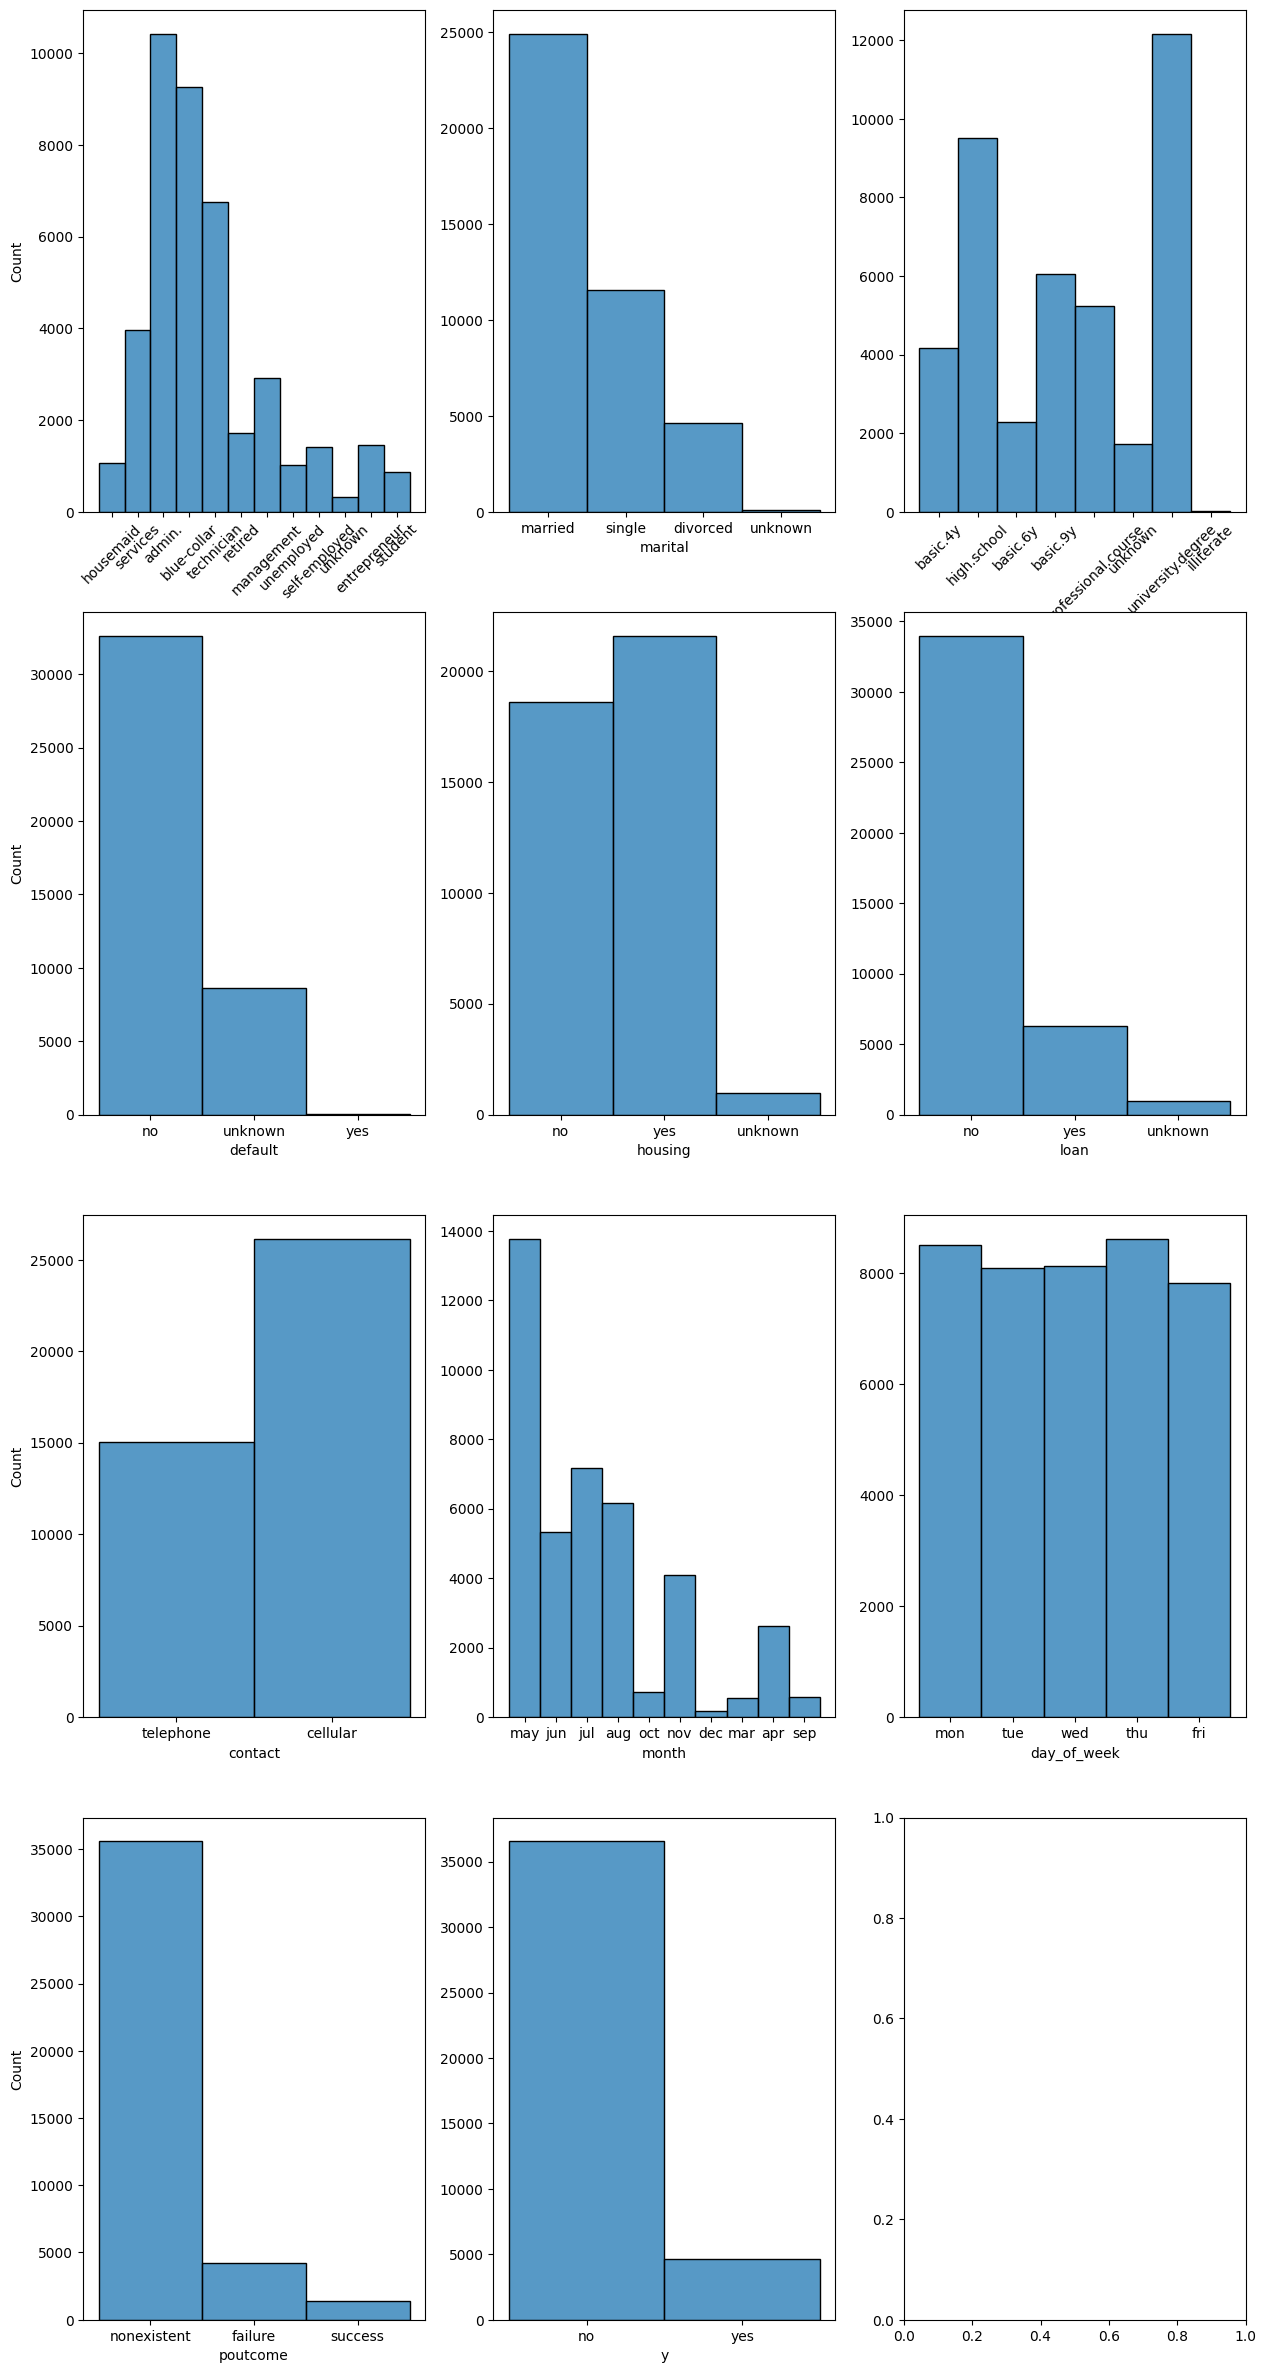

In [22]:
fig, axis = plt.subplots(4, 3, figsize = (15, 30))

sns.histplot(ax = axis[0, 0], data = df, x = "job").set(xlabel = None)
axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=45)
sns.histplot(ax = axis[0, 1], data = df, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "education").set(ylabel = None)
axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=45)
sns.histplot(ax = axis[1, 0], data = df, x = "default")
sns.histplot(ax = axis[1, 1], data = df, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "loan").set( ylabel = None)
sns.histplot(ax = axis[2, 0], data = df, x = "contact")
sns.histplot(ax = axis[2, 1], data = df, x = "month").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = df, x = "day_of_week").set( ylabel = None)
sns.histplot(ax = axis[3, 0], data = df, x = "poutcome")
sns.histplot(ax = axis[3, 1], data = df, x = "y").set( ylabel = None)

- Gran parte de los individuos en la muestra tiene trabajos de admin, cuello Azul y tecnico (sobre 6000 entradas cada una), representando casi la mitad de los datos. Los otros empleos conocidos fluctuan entre 1.000 y 4.000 entradas cada uno.
- Mas de la mitad de los individuos son casados, alrededor de un cuarto solteros y algo menos de un octavo son divorciados.
- Algo más de un 40% de los individuos posee estudios superiores, siendo los universitarios casi el doble de aquellos con cursos profesionales. Algo menos de un cuarto tiene estudios secundarios completos, mientras que casi un tercio de los individuos tiene estudios basicos incompletos.
- La mayor parte de los individuos no cae en default o se desconoce el dato. Una porcion minima cae en default perdiendo acceso a credito.
- Algo mas de la mitad de los invdividuos mantiene un prestame de vivienda.
- Solo un octavo de los individuos mantiene un prestamo personal.
- Un poco mas de un tercio de los individuos es contactado via telefono fijo. El resto via telefono movil.
- Casi un tercio de los clientes fue contactado en mayo por ultima vez. Alrededor de la mitad fueron contactados por ultima vez entre junio, julio y agosto (en torno a los 6.000 en cada mes). El resto de los meses muestra numeros bajo 1.000 clientes, con excepcion de noviembre y abril (4.000 y 3.000 aproximadamente)
- No hay diferencias en el dia de la semana donde tuvo lugar el ultimo contacto.
- De la campaña de marketing anterior, solo alrededor de 6.000 clientes fueron contactados, de los que solo 1.500 respondieron positivamente. 
- Solo alrededor de un octavo de los clientes toma un deposito de largo plazo.

**3.2 Analisis de Variables Numericas**

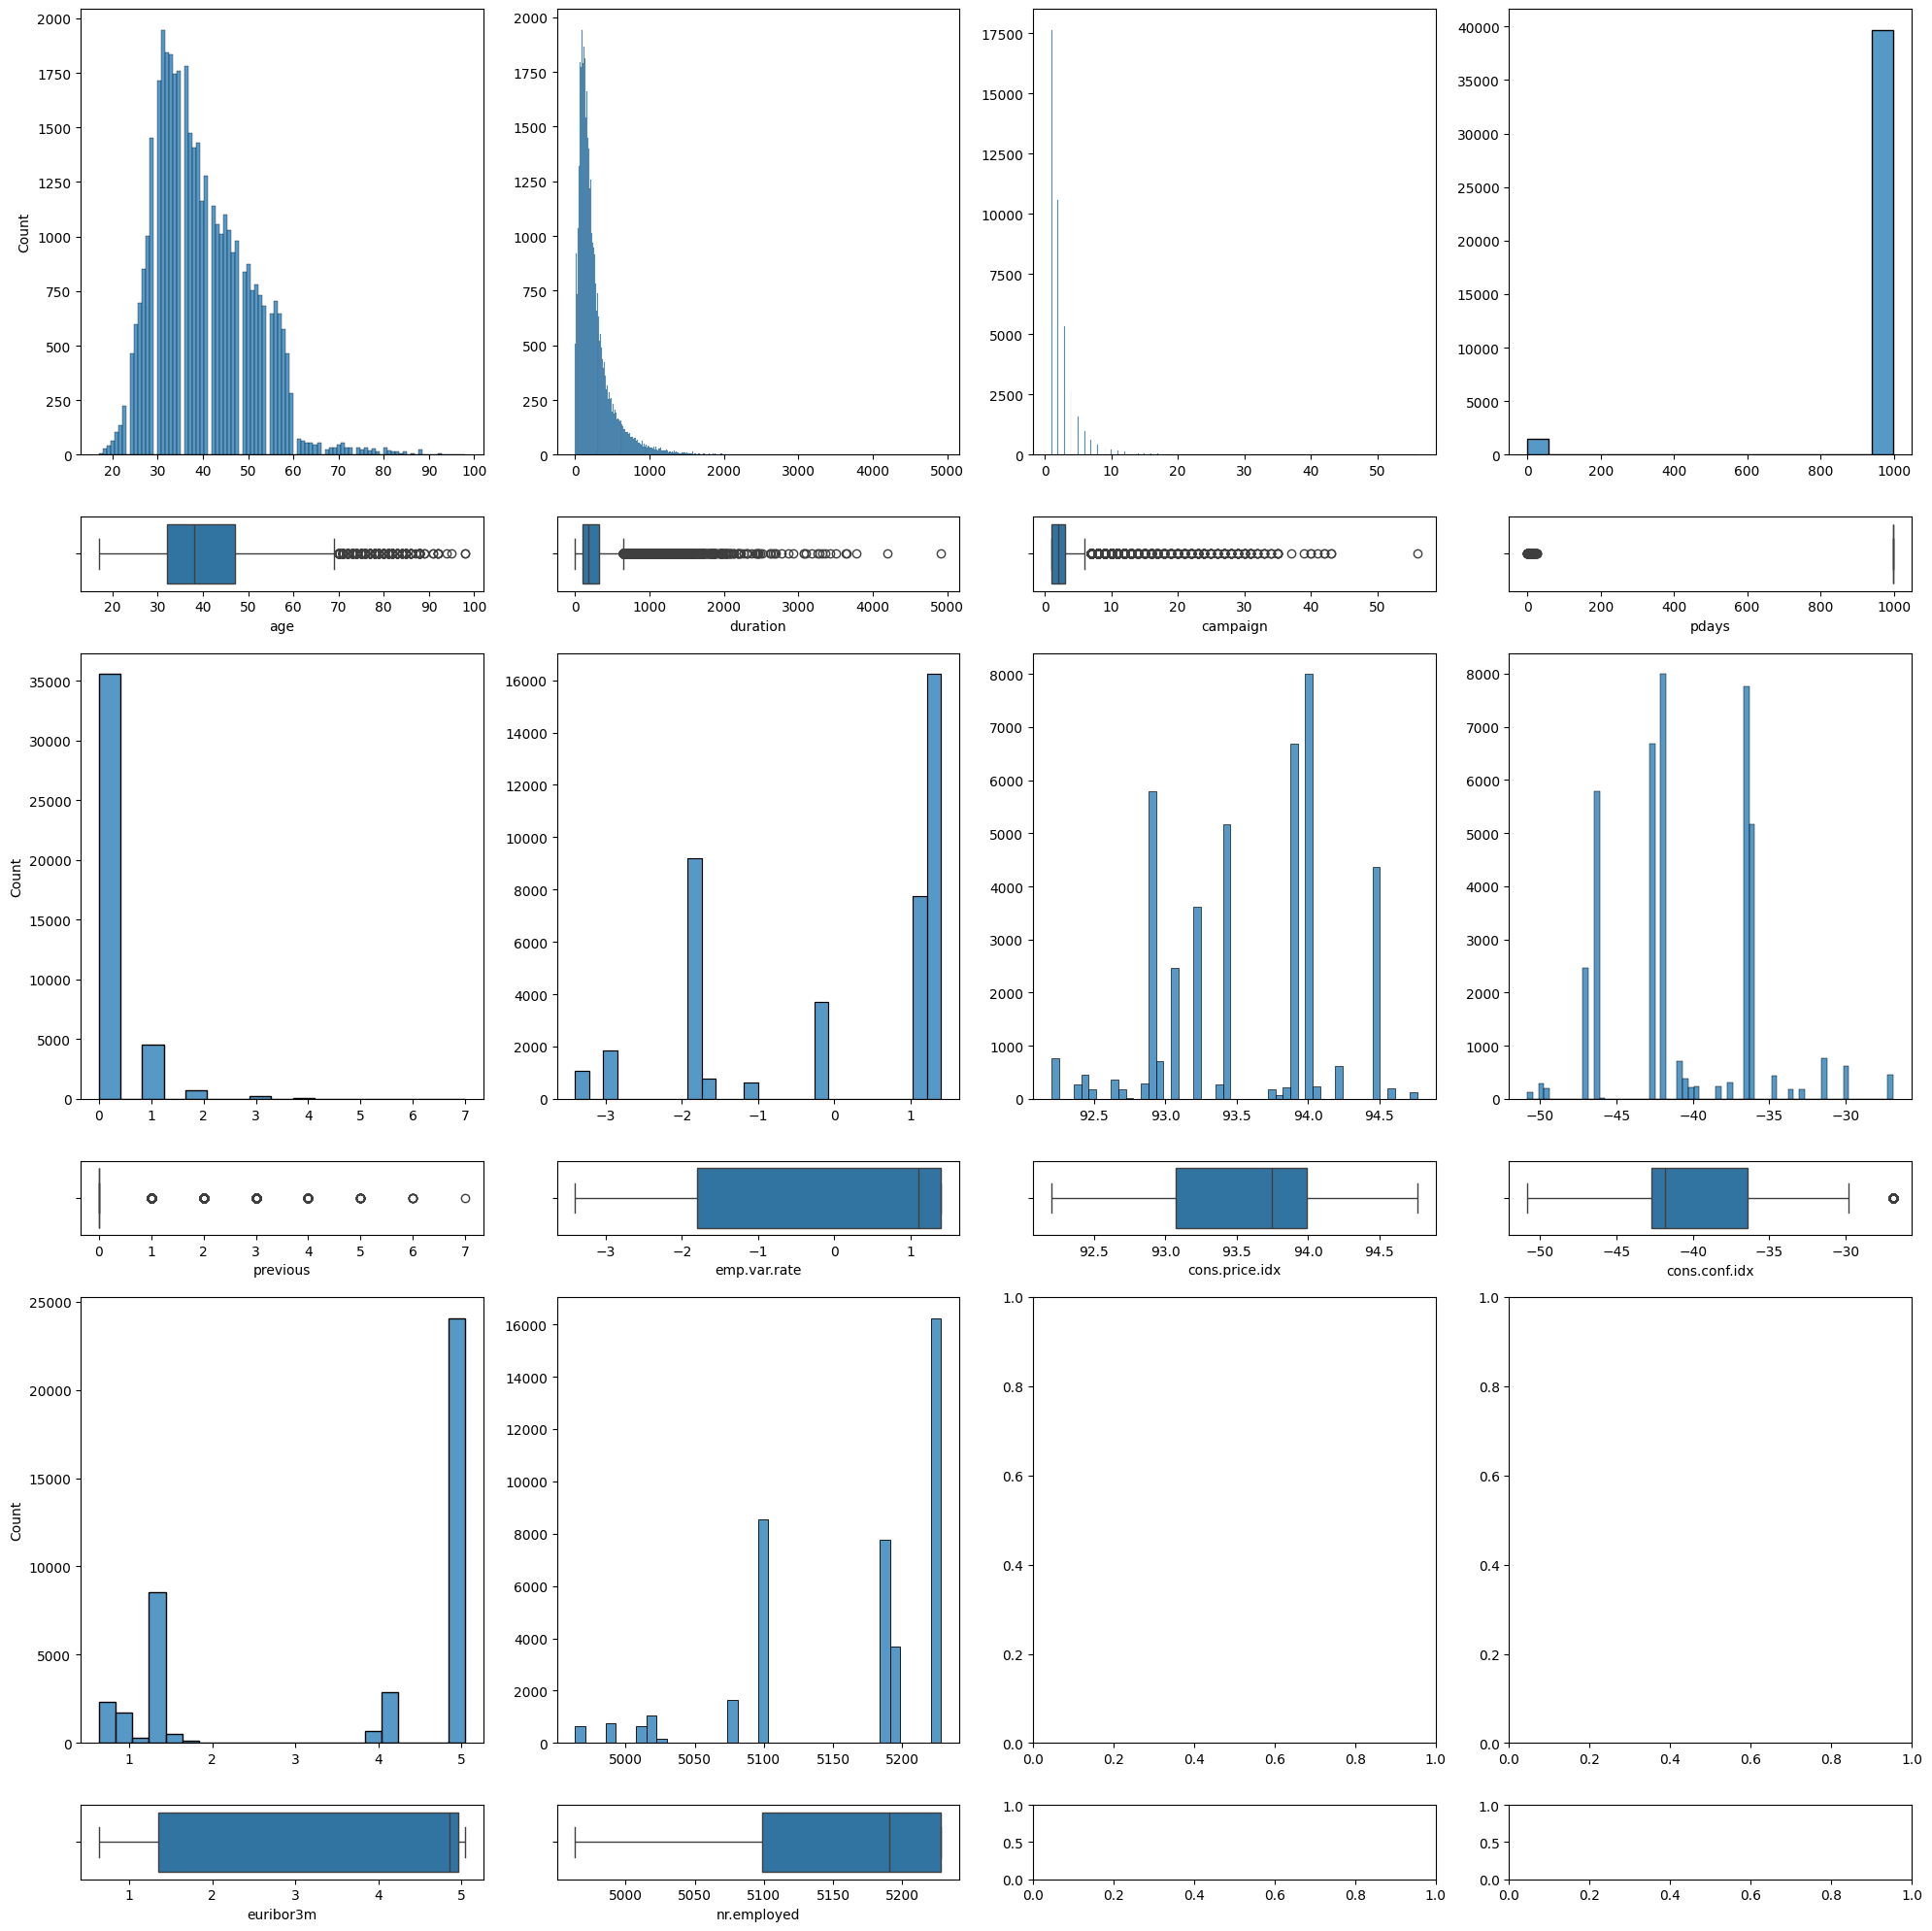

In [23]:
fig, axis = plt.subplots(6, 4, figsize = (20, 20), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "duration")
sns.histplot(ax = axis[0, 2], data = df, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "campaign")
sns.histplot(ax = axis[0, 3], data = df, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "pdays")

sns.histplot(ax = axis[2, 0], data = df, x = "previous").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "previous")
sns.histplot(ax = axis[2, 1], data = df, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "emp.var.rate")
sns.histplot(ax = axis[2, 2], data = df, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = df, x = "cons.price.idx")
sns.histplot(ax = axis[2, 3], data = df, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = df, x = "cons.conf.idx")

sns.histplot(ax = axis[4, 0], data = df, x = "euribor3m").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "euribor3m")
sns.histplot(ax = axis[4, 1], data = df, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "nr.employed")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- La edad de los clientes sigue una distribucion normal sesgada hacia la izquierda, con el 50% de los datos entre 32 y 48. Se muestran como valores atipicos aquellos datos sobre 70.
- La distribucion de la duracion de los llamados se concentra fuertemente entre los 100 y 250 segundos con la mitad de los datos en ese rango y un peak muy compacto y pronunciado sobre el mismo. Duraciones por sobre los 600 segundos son considerados valores atipicos.
- Algo menos de la mitad de los clientes fueron contactados solo una vez. Aquellos clientes contactados una vez mas, disminuyen en cantidad a la mitad de manera sucesiva.
- Casi la totalidad de los clientes fueron contactados nuevamente tras alrededor de 1.000 dias desde la ultima vez. Solo alrededor de 1.000 fueron contactados entre 0 y 50 dias despues del ultimo contacto.
- Cerca de un 85% de los clientes no fue contactado para la campaña anterior. De aquellos que fueron contactados, casi todos fueron contactados solo una vez.
- La mitad de los individuos muestra una tasa de variacion de empleo por sobre 1. La otra mitad se distribuye entre -4 y 1, con cierta concentracion de datos entre -2 y -1.5.
- El indice de precios al consumidor fluctua principalmente entre 93 y 94, con valores extremos alcanzando un rango entre 92 y 95.
- El indice de confianza del consumidor fluctua principalmente entre -47.5 y -36, con valores extremos alcanzando un rango entre -50 y -30. Solo algunos valores atipicos se encuentran por sobre este umbral.
- El Euribor a 3 meses se muestra alrededor de 5 para mas de la mitad de los datos. Solo el valor de 1 llegar a ser cercano a un cuarto, con el resto obteniendo frecuencias relativamente bajas.
- El indicador de numero de empleados fluctua principalmente entre 5.100 y 5.250, con gran concentracion de datos cercanos al limite superior de este rango. Los valores extremos hacia la izquierda no caen de 4.950.

**Paso 4: Analisis de Variables Multivariadas**

**4.1 Analisis de Correlacion**

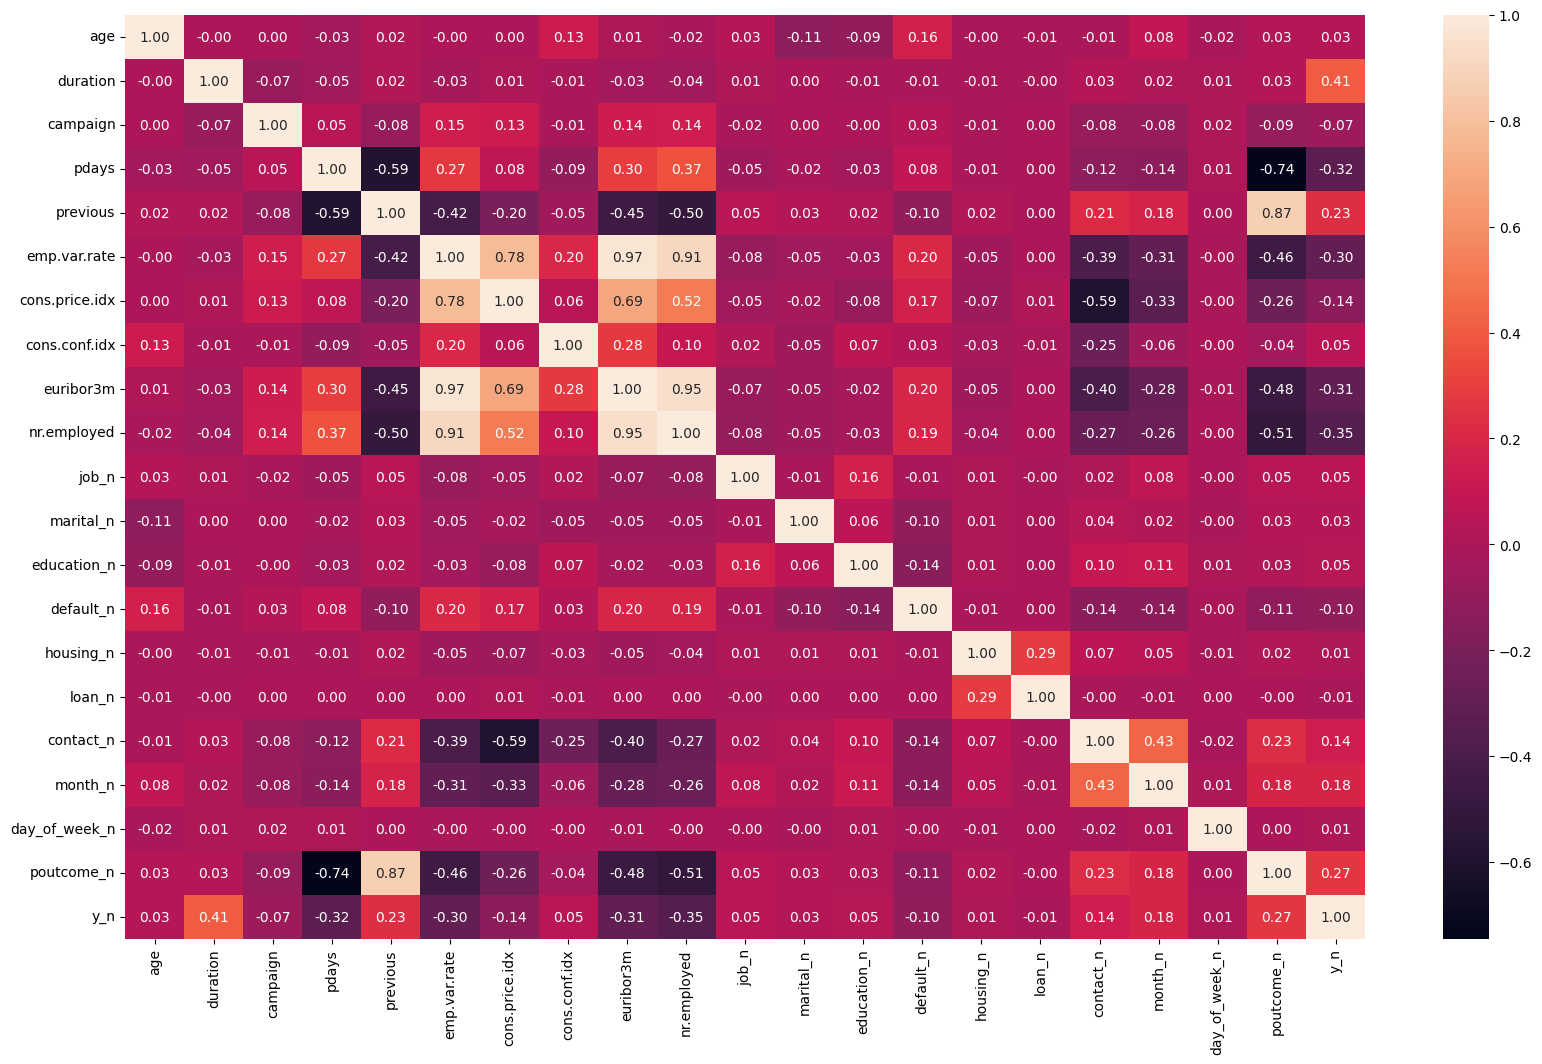

In [24]:
#crear dataframe de correlacion
df_corr = df.copy()

#factoriar variables categoricas
categorical_vars = []

for col in df_corr.columns:
    if df[col].dtype == 'object':
        categorical_vars.append(col)
        df_corr[col+"_n"] = pd.factorize(df_corr[col])[0]

df_corr.drop(columns = categorical_vars, inplace=True)

fig, axis = plt.subplots(figsize = (20, 12))
sns.heatmap(df_corr.corr(), annot = True, fmt = ".2f")
plt.show()

**4.1 Analisis Numerico-Categorico**

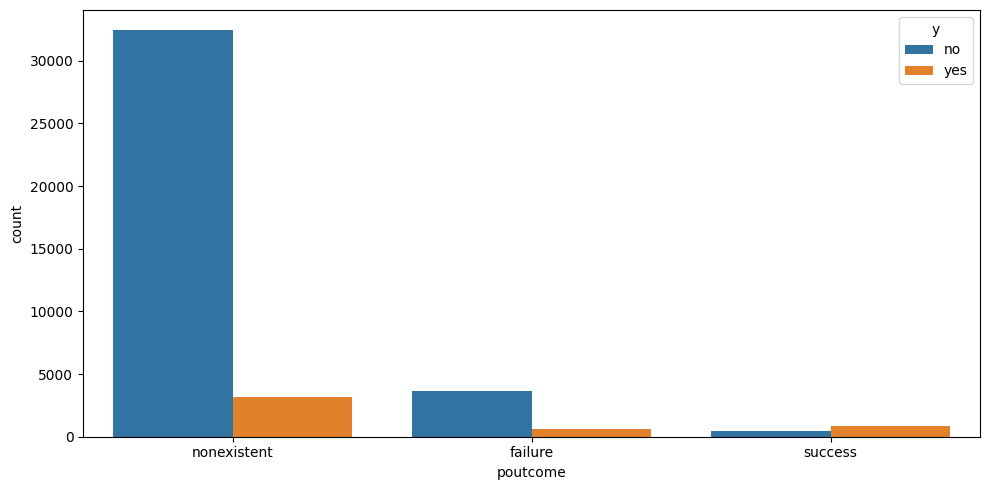

In [29]:
#crear grilla para graficos
fig, axis = plt.subplots(figsize = (10, 5))

#calcular matrices de correlacion
sns.countplot(data = df, x = "poutcome", hue = "y")

# ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- Aquellos clientes de dato desconocido en cuanto al resultado de la campaña anterior (mas del 75% de los datos) tienen una menor proporcion de individuos que tomaron un deposito a largo plazo, en comparacion con aquellos casos de resultado conocido (fracaso o exito).
- Los casos conocidos de fracaso de la campaña anterior contienen algunos clientes que tomaron un deposito a largo plazo en relacion aproximada de 1 a 5.
- Los casos conocidos de exito de la campaña anterior tienen una mayor cantidad de individuos que si tomaron el deposito a largo plazo, siendo estos alrededor del doble de quienes no lo tomaron.

**4.2 Analisis Numerico-Numerico**

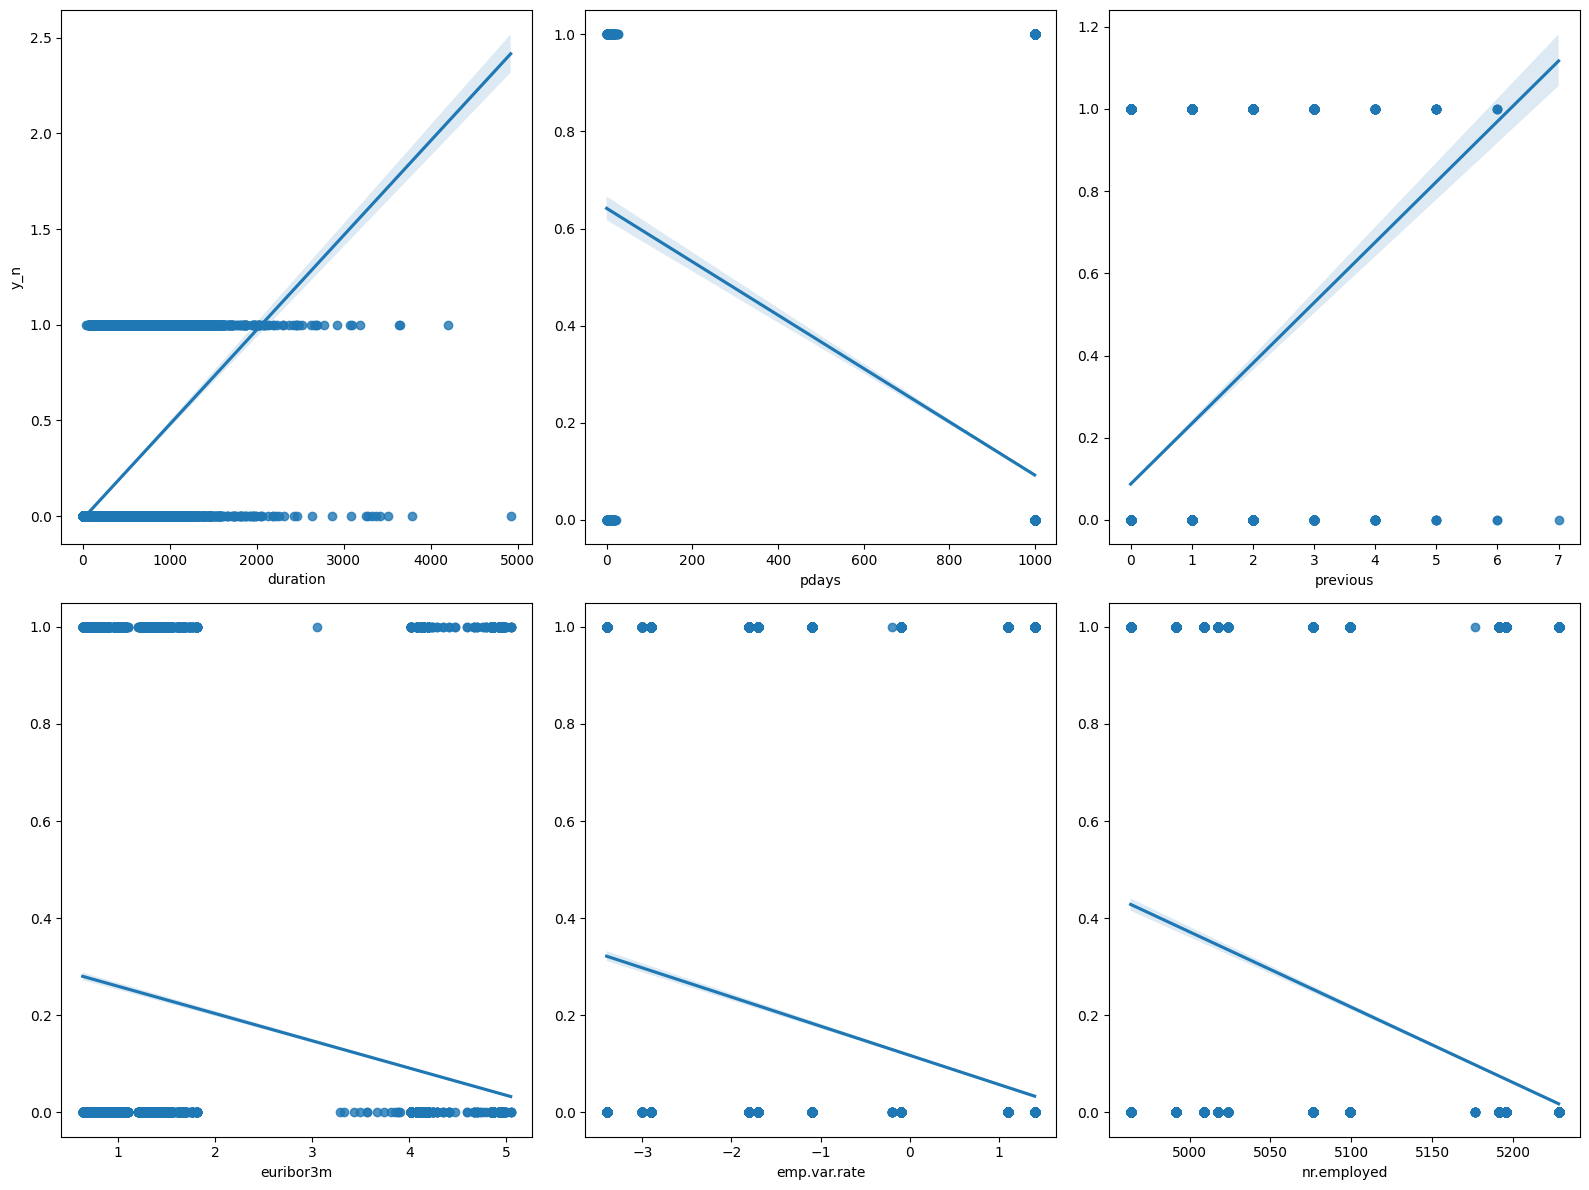

In [42]:
#crear grilla para graficos
fig, axis = plt.subplots(2, 3, figsize = (16, 12))

#calcular matrices de correlacion
sns.regplot(ax = axis[0,0], data = df_corr, x = "duration", y = "y_n")
current_ticks = axis[0,0].get_xticks()
sns.regplot(ax = axis[0,1], data = df_corr, x = "pdays", y = "y_n").set(ylabel = None)
sns.regplot(ax = axis[0,2], data = df_corr, x = "previous", y = "y_n").set(ylabel = None)
sns.regplot(ax = axis[1,0], data = df_corr, x = "euribor3m", y = "y_n").set(ylabel = None)
sns.regplot(ax = axis[1,1], data = df_corr, x = "emp.var.rate", y = "y_n").set(ylabel = None)
sns.regplot(ax = axis[1,2], data = df_corr, x = "nr.employed", y = "y_n").set(ylabel = None)

# ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- Las variables de duracion de llamada y numero de contactos con el cliente durante la campaña anterior muestran una correlacion moderada positiva con la variable objetivo.
- Las variables de numero de dias desde el ultimo contacto, euribor 3-M, tasa de variacion de empleo e indicador de empleabilidad tienen una correlacion moderada a debil con la variables objetivo.

**4.4 Analisis de Correlacion**

In [ ]:
# funcion para indetificar columnas binarias
def is_bool(df, cols):
  df_ = df.copy()
  bool_vars = []
  for col in cols:
    if (df[col].dtype == int) or (df[col].dtype == float):
      flag = True
      unique_list = df[col].unique()
      for value in unique_list:
        if (value not in [1, 0, 0.0, 1.0]) and (np.isnan(value) == False):
          flag = False
      if flag == True:
        bool_vars.append(col)
  return bool_vars

def breakdown_vars(df):
  categorical_vars = []
  boolean_vars = []
  normal_vars = []
  non_normal_vars = []
  boolean_vars = is_bool(df, df.columns)
  for col in df.columns:
    if (df[col].dtype == 'object' or df[col].dtype == 'category') and col not in boolean_vars:
      categorical_vars.append(col)
    elif (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col not in boolean_vars:
      n, p = stats.shapiro(df[col])
      if p < 0.05:
        non_normal_vars.append(col)
      else:
        normal_vars.append(col)
  return categorical_vars,  boolean_vars, normal_vars, non_normal_vars